In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from IPython.core import display as disp
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv("vinos.csv")#Leemos el fichero csv
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
data.info()#tipos de las columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
data.columns#nombres de las columnas

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# Para 5 de las características que consideres que mas influyen: calcula y establece que tipo de relación hay entre ellas, dibuja un diagrama de dispersión con los casos en el que también se incluya el modelo obtenido y por último haz una predicción con varios datos.

In [5]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [6]:
data.corr()['quality'][:]

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

Seleccionamos las caracteristicas que mas relacion tengan con la quality ya sea positiva o negativa

In [7]:
datacaract=data[['alcohol','sulphates','volatile acidity','citric acid','total sulfur dioxide','quality']]
datacaract

,alcohol,sulphates,volatile acidity,citric acid,total sulfur dioxide,quality
0,9.4,0.56,0.700,0.00,34.0,5
1,9.8,0.68,0.880,0.00,67.0,5
2,9.8,0.65,0.760,0.04,54.0,5
3,9.8,0.58,0.280,0.56,60.0,6
4,9.4,0.56,0.700,0.00,34.0,5
...,...,...,...,...,...,...
1594,10.5,0.58,0.600,0.08,44.0,5
1595,11.2,0.76,0.550,0.10,51.0,6
1596,11.0,0.75,0.510,0.13,40.0,6
1597,10.2,0.71,0.645,0.12,44.0,5


### calcula y establece que tipo de relación hay entre ellas

In [8]:
datacaract.corr()

,alcohol,sulphates,volatile acidity,citric acid,total sulfur dioxide,quality
alcohol,1.000000,0.093595,-0.202288,0.109903,-0.205654,0.476166
sulphates,0.093595,1.000000,-0.260987,0.312770,0.042947,0.251397
volatile acidity,-0.202288,-0.260987,1.000000,-0.552496,0.076470,-0.390558
citric acid,0.109903,0.312770,-0.552496,1.000000,0.035533,0.226373
total sulfur dioxide,-0.205654,0.042947,0.076470,0.035533,1.000000,-0.185100
quality,0.476166,0.251397,-0.390558,0.226373,-0.185100,1.000000


In [9]:
#Variables que hemos seleccionado para la prediccion que se meten en array para facilitar su uso
variables = ['alcohol','sulphates','volatile acidity','citric acid','total sulfur dioxide']

In [10]:
#bucle que calcula el coeficiente de correlacion de una variable con todas las demas
#ademas indica si se trata de una relacion lineal y en el caso de que lo sea indicara si es positiva o negativa.
for var in variables:
    for var1 in variables:
        if(var!=var1):
            r = np.corrcoef(datacaract[var], datacaract[var1])[1][0]
            if(abs(r)>0.1):
                if(r>0):
                    print('La relacion que hay entre '+str(var) +' y '+ str(var1)+' es: '+str(r)+' se trata de una relacion lineal positiva')
                else:
                    print('La relacion que hay entre '+str(var) +' y '+ str(var1)+' es: '+str(r)+' se trata de una relacion lineal negativa')
            else:
                print('La relacion que hay entre '+str(var) +' y '+ str(var1)+' es: '+str(r)+' se trata de una relacion no lineal')

La relacion que hay entre alcohol y sulphates es: 0.09359475041046733 se trata de una relacion no lineal
La relacion que hay entre alcohol y volatile acidity es: -0.2022880271532561 se trata de una relacion lineal negativa
La relacion que hay entre alcohol y citric acid es: 0.10990324664156695 se trata de una relacion lineal positiva
La relacion que hay entre alcohol y total sulfur dioxide es: -0.205653943743671 se trata de una relacion lineal negativa
La relacion que hay entre sulphates y alcohol es: 0.09359475041046735 se trata de una relacion no lineal
La relacion que hay entre sulphates y volatile acidity es: -0.2609866852832895 se trata de una relacion lineal negativa
La relacion que hay entre sulphates y citric acid es: 0.31277004385441687 se trata de una relacion lineal positiva
La relacion que hay entre sulphates y total sulfur dioxide es: 0.04294683623953833 se trata de una relacion no lineal
La relacion que hay entre volatile acidity y alcohol es: -0.2022880271532561 se trata

In [11]:
#Quitamos los primeros 10 rows para utilizarlos en el ultimo apartado
test=datacaract.head(10)
datacaract.drop(datacaract.head(10).index,inplace=True)

/Users/roig/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Diagramas  de distribucion

In [12]:
#Variables que hemos seleccionado para la prediccion que se meten en array para facilitar su uso
variables = ['alcohol','sulphates','volatile acidity','citric acid','total sulfur dioxide']

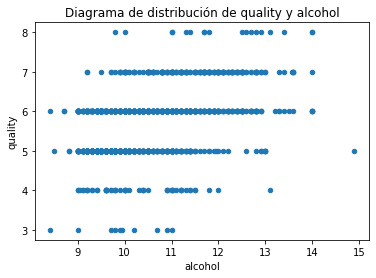

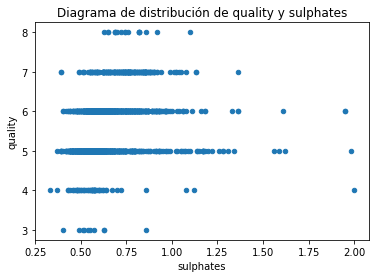

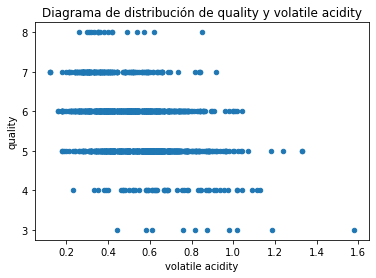

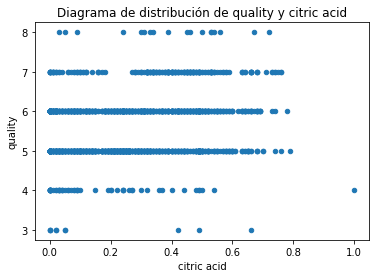

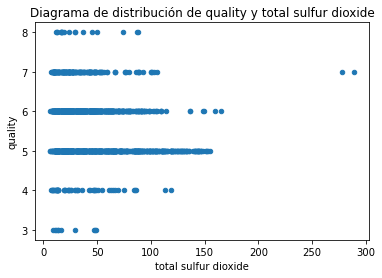

In [13]:
for var in variables:
    titulo=('Diagrama de distribución de quality y '+ str(var))
    datacaract.plot(var,'quality','scatter',title=titulo)

### Modelos

In [14]:
#Creacion del dataframe al que se le añadiran los datos de los modelos
dataframe = pd.DataFrame(columns=['variable','target','r','R^2','RMSE'])

5.637037041879808
[0.40067993]
VARIABLE:  alcohol
Coeficiente de pearson (R): 0.4776059612986344
Coeficiente de determinacion (R^2): 0.2277560389882889
El error del modelo es (RMSE):  0.7280553936862066


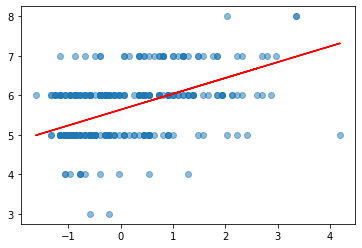

5.637871278896746
[0.24209703]
VARIABLE:  sulphates
Coeficiente de pearson (R): 0.2534627154498983
Coeficiente de determinacion (R^2): 0.062085138073914914
El error del modelo es (RMSE):  0.8118200225625785


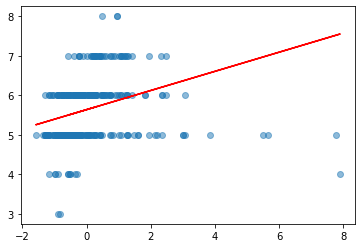

5.635616525943302
[-0.31200881]
VARIABLE:  volatile acidity
Coeficiente de pearson (R): -0.3907019059160534
Coeficiente de determinacion (R^2): 0.15262794407480018
El error del modelo es (RMSE):  0.7377343526083996


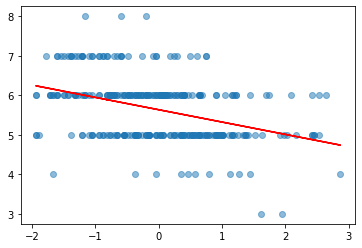

5.632615826978823
[0.19249143]
VARIABLE:  citric acid
Coeficiente de pearson (R): 0.2270367332957728
Coeficiente de determinacion (R^2): 0.05138746397400573
El error del modelo es (RMSE):  0.7930017710582636


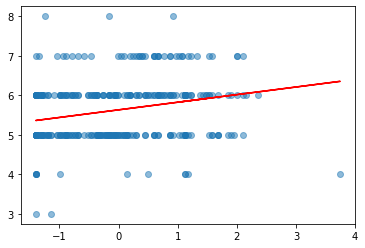

5.6337204066171225
[-0.14400401]
VARIABLE:  total sulfur dioxide
Coeficiente de pearson (R): -0.1834047081300884
Coeficiente de determinacion (R^2): 0.03359681536450754
El error del modelo es (RMSE):  0.7880677605822809


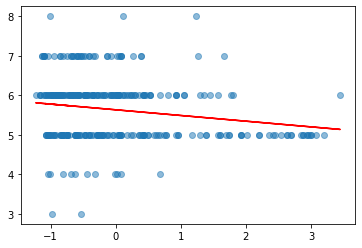

In [15]:
for var in variables:
#Creamos los datos con de entrenamiento y el test
    x=datacaract[[var]]
    y = datacaract['quality']
    # Estandarizamos los datos pero no el target
    scaler = StandardScaler()
    x = scaler.fit_transform(x)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
    #Regresion de cada variable junto con el target quality
    modelo = linear_model.LinearRegression()
    #fit
    modelo.fit(x_train,y_train)
    #predic
    prediccion = modelo.predict(x_test)
    #Datos caracteristicos del modelo
    #Utilizamos el RMSE para calcular el error
    error=np.sqrt(metrics.mean_squared_error(y_test,prediccion))
    #coeficiente de determinacion
    coefdeter = modelo.score(x,y)
    #coeficiente de correlacion o de pearson
    r = np.corrcoef(datacaract[var], datacaract['quality'])[1][0]
    print(modelo.intercept_)
    print(modelo.coef_)
    #Prints
    print('VARIABLE: ',var)
    print("Coeficiente de pearson (R):",r)
    print("Coeficiente de determinacion (R^2):",coefdeter)
    print("El error del modelo es (RMSE): ", error)
    #Guardado de los datos en dataframe para su comparacion
    dataframe = dataframe.append({'variable': var, 
                                    'target' : 'quality',
                                    'r': r,
                                     'R^2':coefdeter,
                                     'RMSE':error}, ignore_index=True)
    #plot de todas las variables con el target
    plt.scatter(x_test, y_test,alpha=0.5)
    #plot de todas las variables junto con su prediccion representada con una linea
    plt.plot(x_test, prediccion,color='red')
    plt.show()



In [16]:
dataframe

,variable,target,r,R^2,RMSE
0,alcohol,quality,0.477606,0.227756,0.728055
1,sulphates,quality,0.253463,0.062085,0.811820
2,volatile acidity,quality,-0.390702,0.152628,0.737734
3,citric acid,quality,0.227037,0.051387,0.793002
4,total sulfur dioxide,quality,-0.183405,0.033597,0.788068


### prediccion

In [17]:
test

,alcohol,sulphates,volatile acidity,citric acid,total sulfur dioxide,quality
0,9.4,0.56,0.70,0.00,34.0,5
1,9.8,0.68,0.88,0.00,67.0,5
2,9.8,0.65,0.76,0.04,54.0,5
3,9.8,0.58,0.28,0.56,60.0,6
4,9.4,0.56,0.70,0.00,34.0,5
5,9.4,0.56,0.66,0.00,40.0,5
6,9.4,0.46,0.60,0.06,59.0,5
7,10.0,0.47,0.65,0.00,21.0,7
8,9.5,0.57,0.58,0.02,18.0,7
9,10.5,0.80,0.50,0.36,102.0,5


In [18]:
dataframe3 = pd.DataFrame(columns=['variable','target','r','R^2','RMSE'])

VARIABLE:  alcohol
Coeficiente de pearson (R): 0.10925355610938407
Coeficiente de determinacion (R^2): -0.035557401903813846
El error del modelo es (RMSE):  1.2751431161087114


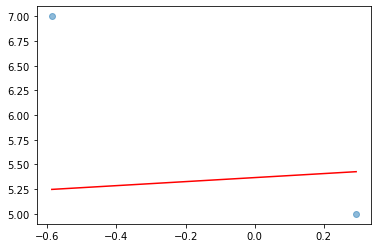

VARIABLE:  sulphates
Coeficiente de pearson (R): -0.3720217704029084
Coeficiente de determinacion (R^2): 0.10559325231066508
El error del modelo es (RMSE):  1.1314934264482437


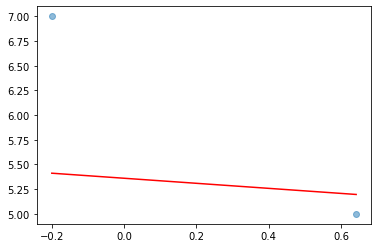

VARIABLE:  volatile acidity
Coeficiente de pearson (R): -0.3370104416003599
Coeficiente de determinacion (R^2): 0.07706914058420133
El error del modelo es (RMSE):  1.1183785932554213


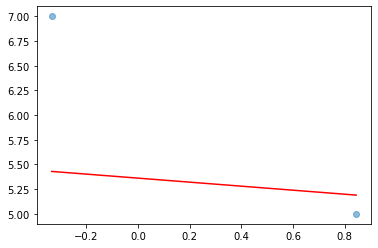

VARIABLE:  citric acid
Coeficiente de pearson (R): 0.053763246606726656
Coeficiente de determinacion (R^2): -0.03210049949032423
El error del modelo es (RMSE):  1.2138908138563465


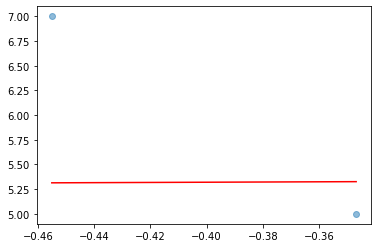

VARIABLE:  total sulfur dioxide
Coeficiente de pearson (R): -0.555495397222274
Coeficiente de determinacion (R^2): 0.2544869875828428
El error del modelo es (RMSE):  0.8985711138460901


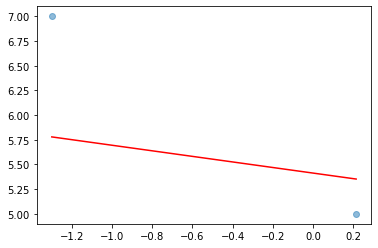

In [19]:
for var in variables:
#Creamos los datos con de entrenamiento y el test
    x=test[[var]]
    y = test['quality']
    # Estandarizamos los datos pero no el target
    scaler = StandardScaler()
    x = scaler.fit_transform(x)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
    #Regresion de cada variable junto con el target quality
    modelo = linear_model.LinearRegression()
    modelo.fit(x_train,y_train)
    prediccion = modelo.predict(x_test)
    #Datos caracteristicos del modelo
    error=np.sqrt(metrics.mean_squared_error(y_test,prediccion))
    coefdeter = modelo.score(x,y)
    r = np.corrcoef(test[var], test['quality'])[1][0]
    #Prints
    print('VARIABLE: ',var)
    print("Coeficiente de pearson (R):",r)
    print("Coeficiente de determinacion (R^2):",coefdeter)
    print("El error del modelo es (RMSE): ", error)
    #Guardado de los datos en dataframe para su comparacion
    dataframe3 = dataframe3.append({'variable': var, 
                                    'target' : 'quality',
                                    'r': r,
                                     'R^2':coefdeter,
                                     'RMSE':error}, ignore_index=True)
    #plot de todas las variables con el target
    plt.scatter(x_test, y_test,alpha=0.5)
    #plot de todas las variables junto con su prediccion representada con una linea
    plt.plot(x_test, prediccion,color='red')
    plt.show()



In [20]:
dataframe3

,variable,target,r,R^2,RMSE
0,alcohol,quality,0.109254,-0.035557,1.275143
1,sulphates,quality,-0.372022,0.105593,1.131493
2,volatile acidity,quality,-0.337010,0.077069,1.118379
3,citric acid,quality,0.053763,-0.032100,1.213891
4,total sulfur dioxide,quality,-0.555495,0.254487,0.898571


# 1. ¿Qué diferencias hay entre los 5 modelos? 

Para sacar las diferencias utilizaremos los datos obtenidos de los modelos no de la prediccion con los nuevos valores.

In [21]:
#ordenamos el datafram segun pearson de menor a mayor en valor absoluto
pearson=dataframe.iloc[dataframe['r'].abs().argsort()]
#ordenamos de menor a mayor segun el rmse
rmse=dataframe.sort_values(by='RMSE', ascending=True,ignore_index=True)
determina=dataframe.sort_values(by='R^2', ascending=True,ignore_index=True)
print('Pearson:')
disp.display(pearson)
print('RMSE:')
disp.display(rmse)
print('Coeficiente de determinacion:')
disp.display(determina)


Pearson:


,variable,target,r,R^2,RMSE
4,total sulfur dioxide,quality,-0.183405,0.033597,0.788068
3,citric acid,quality,0.227037,0.051387,0.793002
1,sulphates,quality,0.253463,0.062085,0.811820
2,volatile acidity,quality,-0.390702,0.152628,0.737734
0,alcohol,quality,0.477606,0.227756,0.728055


RMSE:


,variable,target,r,R^2,RMSE
0,alcohol,quality,0.477606,0.227756,0.728055
1,volatile acidity,quality,-0.390702,0.152628,0.737734
2,total sulfur dioxide,quality,-0.183405,0.033597,0.788068
3,citric acid,quality,0.227037,0.051387,0.793002
4,sulphates,quality,0.253463,0.062085,0.811820


Coeficiente de determinacion:


,variable,target,r,R^2,RMSE
0,total sulfur dioxide,quality,-0.183405,0.033597,0.788068
1,citric acid,quality,0.227037,0.051387,0.793002
2,sulphates,quality,0.253463,0.062085,0.811820
3,volatile acidity,quality,-0.390702,0.152628,0.737734
4,alcohol,quality,0.477606,0.227756,0.728055


Podemos ver que para el mismo target quality le afectan de manera distinta las siguiente variables:
1. La variable alcochol: podemos ver que se trata de la variable que mas afecta a quality dado que es la variable con el coeficiente de pearson mas alto, ademas esta variable cuanta con una bondad del ajuste baja dado que el coeficiente de determinacion es proximo a 0, por ultimo esta variable cuanta con el menor error de entre todas las variables.
2. La variable sulphates: podemos ver que se trata de la tercera variable que mas afecta a quality dado que es la tercera variable con el coeficiente de pearson mas alto , ademas esta variable cuanta con una bondad del ajuste baja dado que el coeficiente de determinacion es proximo a 0, por ultimo esta variable cuanta con el peor error de todas las variables.
3. La variable volatile acidity: podemos ver que se trata de la segunda variable que mas afecta a quality dado que es la tercera variable con el coeficiente de pearson mas alto(en valor absoluto), ademas esta variable cuanta con una bondad del ajuste baja dado que el coeficiente de determinacion es proximo a 0, por ultimo esta variable cuanta con el segundo menor error de entre todas las variables.
4. La variable citric acid: podemos ver que se trata de la cuarta variable que mas afecta a quality dado que es la cuarta variable con el coeficiente de pearson mas alto, ademas esta variable cuanta con una bondad del ajuste baja dado que el coeficiente de determinacion es proximo a 0, por ultimo esta variable cuenta con el cuarto menor error de entre todas las variables.
5. La variable total sulfur dioxide: podemos ver que se trata de la variable que menos afecta a quality de entre todas las que hemos escogido dado que es la variable con el menor coeficiente de pearson , ademas esta variable cuanta con una bondad del ajuste baja dado que el coeficiente de determinacion es proximo a 0, por ultimo esta variable cuenta con el tercer menor error de entre todas las variables.

# 2. Explica cómo funcionaría el posible sistema para clasificar vinos (simplifica la variable “quality” creando 4 clases: muy malo, malo, bueno, muy bueno) creado con los 3 parámetros que más influyen entre los descritos arriba. 

Entiendo que ahora el modelo se entrena solo con los 3 parametros seleccionados.

In [22]:
dataframe

,variable,target,r,R^2,RMSE
0,alcohol,quality,0.477606,0.227756,0.728055
1,sulphates,quality,0.253463,0.062085,0.811820
2,volatile acidity,quality,-0.390702,0.152628,0.737734
3,citric acid,quality,0.227037,0.051387,0.793002
4,total sulfur dioxide,quality,-0.183405,0.033597,0.788068


Podemos ver que las mejores target son el alcohol, los sulphates y volatile acidity	

In [23]:
descr=data.quality.describe()# para crear dichas clases dividiremos segun los cuartiles
descr

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

In [24]:
#Dividimos la calidad en 4 como nos dice el enunciado
conditionlist = [
    (data['quality'] >= descr['min']) & (data['quality'] <=descr['25%']), #0-25
    (data['quality'] > descr['25%']) & (data['quality'] <=descr['50%']),#26-50
    (data['quality'] > descr['50%']) & (data['quality'] <=descr['75%']),#51-75
    (data['quality'] > descr['75%'])]#76-100
choicelist = [1, 2, 3, 4]
data['quality'] = np.select(conditionlist, choicelist, default='Not Specified')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,2
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1


In [25]:
#Se cogen los 3 parametros mas la variable target categorizada
datacaract=data[['alcohol','sulphates','volatile acidity','quality']]
datacaract

,alcohol,sulphates,volatile acidity,quality
0,9.4,0.56,0.700,1
1,9.8,0.68,0.880,1
2,9.8,0.65,0.760,1
3,9.8,0.58,0.280,2
4,9.4,0.56,0.700,1
...,...,...,...,...
1594,10.5,0.58,0.600,1
1595,11.2,0.76,0.550,2
1596,11.0,0.75,0.510,2
1597,10.2,0.71,0.645,1


In [26]:
#Variables que hemos seleccionado para la prediccion
variables = ['alcohol','sulphates','volatile acidity']
#Creacion del dataframe al que se le añadiran los datos de los modelos
dataframe2 = pd.DataFrame(columns=['variable','target','r','R^2','RMSE'])

In [27]:
#Convertimos todo el dataframe en float dado que los nuevos valores de quality son int
#y el modelo tiene problemas para usar el tipo de dato int
datacaract = datacaract.applymap(float)

VARIABLE:  alcohol
Coeficiente de pearson (R): 0.503313930448519
Coeficiente de determinacion (R^2): 0.2524709439352695
El error del modelo es (RMSE):  0.7614632342620846


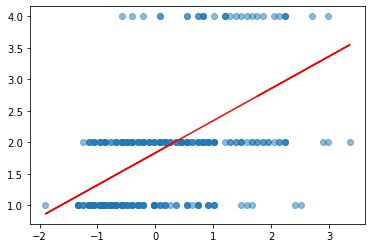

VARIABLE:  sulphates
Coeficiente de pearson (R): 0.2491085386314365
Coeficiente de determinacion (R^2): 0.0616689512456744
El error del modelo es (RMSE):  0.8576825625849593


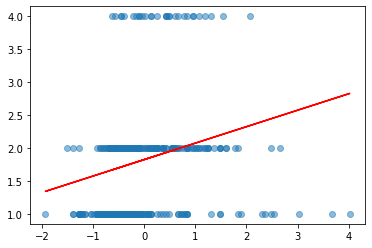

VARIABLE:  volatile acidity
Coeficiente de pearson (R): -0.35096704096586856
Coeficiente de determinacion (R^2): 0.1224948570694463
El error del modelo es (RMSE):  0.8334397112443901


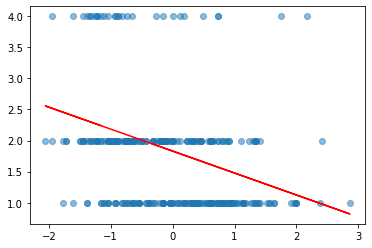

In [28]:
for var in variables:
#Creamos los datos con de entrenamiento y el test
    x=datacaract[[var]]
    y = datacaract['quality']
    # Estandarizamos los datos pero no el target
    scaler = StandardScaler()
    x = scaler.fit_transform(x)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
    #Regresion de cada variable 
    modelo = linear_model.LinearRegression()
    modelo.fit(x_train,y_train)
    prediccion = modelo.predict(x_test)
    #Datos caracteristicos del modelo
    error=np.sqrt(metrics.mean_squared_error(y_test,prediccion))
    coefdeter = modelo.score(x,y)
    r = np.corrcoef(datacaract[var], datacaract['quality'])[1][0]
    #Prints
    print('VARIABLE: ',var)
    print("Coeficiente de pearson (R):",r)
    print("Coeficiente de determinacion (R^2):",coefdeter)
    print("El error del modelo es (RMSE): ", error)
    #Guardado de los datos en dataframe para su comparacion
    dataframe2 = dataframe2.append({'variable': var, 
                                    'target' : 'quality',
                                    'r': r,
                                     'R^2':coefdeter,
                                     'RMSE':error}, ignore_index=True)
    
    #plot,se utiliza un alpha de 0.5 dado que considero que es el mejor para que se vea con claridad el grafico
    #plot de todas las variables con el target
    plt.scatter(x_test, y_test,alpha=0.5)
    #plot de todas las variables junto con su prediccion representada con una linea
    plt.plot(x_test, prediccion,color='red')
    plt.show()



In [29]:
dataframe['Dataframe']='Inicial'
dataframe2['Dataframe']='Postprocesa'

In [30]:
#Se coge el dataframe original las variables que se utilizan en el postprocesamiento
pd.concat([dataframe.head(3),dataframe2]).sort_values(by='RMSE',ignore_index=True, ascending=False)

,variable,target,r,R^2,RMSE,Dataframe
0,sulphates,quality,0.249109,0.061669,0.857683,Postprocesa
1,volatile acidity,quality,-0.350967,0.122495,0.833440,Postprocesa
2,sulphates,quality,0.253463,0.062085,0.811820,Inicial
3,alcohol,quality,0.503314,0.252471,0.761463,Postprocesa
4,volatile acidity,quality,-0.390702,0.152628,0.737734,Inicial
5,alcohol,quality,0.477606,0.227756,0.728055,Inicial


Tras cambiar los valores del la columna de quality podemos ver que funcionaria de la misma forma que en los casos anteriores pero en este caso tras cambiar los valores de quatity ha aumentado el error de los modelos en 2 de las 3 variables como se pude ver en la columna de RMSE.

# Referencias
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
https://www.statisticshowto.com/probability-and-statistics/regression-analysis/rmse-root-mean-square-error/
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html
https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py